In [1]:
import os
import sys
import glob
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits

from   astropy.table import Table

In [2]:
def grab_ddplimit(fpath):
    dat = fits.open(fpath)

    result = {}
    
    for key in ['RLIM', 'GMR_0P0', 'GMR_0P1', 'ALL']:
        result[key] = dat[1].header[key]
        
    result['DATA'] = Table(dat[1].data)
    result['COUNT'] = fpath.split('_')[-1].replace('.fits', '')
    
    return result

In [3]:
! pwd

/cosma/home/durham/dc-wils7/DESI


In [4]:
fpaths = glob.glob(os.environ['HOME'] + '/data/GAMA4/ddrp_limits/*.fits')

In [5]:
ddp_limits = [grab_ddplimit(x) for x in fpaths]

In [6]:
gama_kE = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_kE.fits')
gama_kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64
218760,587725076066468464,140.76184403,0.88138861,19.285234,0.19148,4,G09_Y2_016_317,6,20.92196,19.863764,19.221165,18.91657,18.758524,658.2304679092451,39.09188990436649,G9,-427.8330938224349,349.4068458150677,8.49804217431823,0.6425991,0.48144473504871893,0,3,-0.08253885963365701,0.07861551115258505,0.11357102748632342,0.3017968172070399,0.4543733161142445,2.12,-0.1857356,-0.40593758,-19.734490882352347,-19.514288898304457,39.01972533364629,38.7995233495984
514222,588010357995208988,140.43170714,2.70322146,18.915146,0.14678,4,G09_Y2_042_287,6,21.589085,19.783735,18.913113,18.392132,18.141521,490.20543377838897,38.45189060482602,G9,-329.1495629694051,271.98953125357735,20.16024784947387,0.87062263,0.7728269220198738,0,5,-0.05485153795869698,0.04294417490912461,0.17349867310879555,0.3710348496743173,0.6730864583221735,0.8,-0.1423766,-0.117424004,-19.567866802215363,-19.59281940013149,38.4830126762388,38.50796527415493
136729,587724650329014562,175.98187034,-1.68652677,17.821947,0.10723,4,G12_Y1_BS1_111,6,20.750114,18.915552,17.888975,17.370033,16.957827,348.57500517451376,37.7114812124361,G12,-313.90729155002373,22.05035129652807,-9.26544554551312,1.026577,1.0076820215507178,0,6,-0.09325731567799292,-0.07436234137910137,0.14132080272041764,0.324264347557832,0.843633451012195,0.8,-0.1040131,-0.085784,-19.92684181711174,-19.945070914239654,37.748788914890056,37.76701801201797
8301,588848900987158689,181.68685894,0.7011761,17.671268,0.09026,4,G12_Y6_061_170,6,20.462242,18.581089,17.676947,17.264162,16.943651,289.90010408167615,37.31124185639019,G12,-265.7648322504193,-7.826708372577856,3.253957772909903,0.9041424,0.9274551055428526,0,6,-0.11610680033790788,-0.13941952612018324,0.11045695863690697,0.24497721963462613,0.769622118763023,0.8,-0.087552205,-0.072208,-19.662878147164204,-19.678222349682667,37.33414661029897,37.349490812817436
660000,587729150915772570,140.29266091,-1.49659397,18.37324,0.19381,4,G09_Y4_215_048,6,20.901785,19.268467,18.358198,18.044136,17.891954,667.2133985674924,39.12132379475438,G9,-429.8204948973231,356.9368642006288,-14.596929953902679,0.9102688,0.7098572373522847,0,5,-0.02343535675875605,0.17697618945829519,0.20062064455143294,0.4817345989168716,0.6291548292038973,2.12,-0.1879957,-0.41087717,-20.760709220065625,-20.53782775391534,39.13394873727754,38.91106727112726
345969,587726033301209510,131.84474743,1.97358773,19.54565,0.26095,4,G09_Y3_024_111,5,22.761194,21.052927,19.575912,19.074472,18.725279,935.2452451958234,39.85462754457326,G9,-494.50458449144605,552.2047314010108,25.54321579551912,1.4770145,0.9962657073577251,0,6,0.13130690507558437,0.612055739343836,0.36464012287634134,1.00882229587145,0.8328323686308681,0.8,-0.2531215,-0.20876001,-20.420495690024982,-20.464857177055965,39.96614617220271,40.010507659233696
262800,587726015623856358,221.23507916,2.2316643,19.523146,0.14096,4,G15_Y4_220_128,5,22.273722,20.373041,19.415947,18.840586,18.559278,468.942043023823,38.35559585589638,G15,-308.8472360150555,-270.7095026204053,16.004613016680906,0.9570942,0.8588496288146525,0,5,-0.054556461327301436,0.04368810236292883,0.17325262861215815,0.403139247848019,0.727207573269022,0.8,-0.13673119,-0.112767994,-18.868971616379763,-18.89293481444552,38.39211729203895,38.416080490104704

In [7]:
gama_ddp = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_ddp.fits')
gama_ddp

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN,DDP [3]
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,int64
218760,587725076066468464,140.76184403,0.88138861,19.285234,0.19148,4,G09_Y2_016_317,6,20.92196,19.863764,19.221165,18.91657,18.758524,658.2304679092451,39.09188990436649,G9,-427.8330938224349,349.4068458150677,8.49804217431823,0.6425991,0.48144473504871893,0,3,-0.08253885963365701,0.07861551115258505,0.11357102748632342,0.3017968172070399,0.4543733161142445,2.12,-0.1857356,-0.40593758,-19.734490882352347,-19.514288898304457,39.01972533364629,38.7995233495984,0.5147648,0.2469454249819889,0.0,-7.2852345,0.006675859535403247,0.0,0 .. 0
514222,588010357995208988,140.43170714,2.70322146,18.915146,0.14678,4,G09_Y2_042_287,6,21.589085,19.783735,18.913113,18.392132,18.141521,490.20543377838897,38.45189060482602,G9,-329.1495629694051,271.98953125357735,20.16024784947387,0.87062263,0.7728269220198738,0,5,-0.05485153795869698,0.04294417490912461,0.17349867310879555,0.3710348496743173,0.6730864583221735,0.8,-0.1423766,-0.117424004,-19.567866802215363,-19.59281940013149,38.4830126762388,38.50796527415493,0.88485336,0.21070684751247823,0.0,-6.915146,0.0068939973687066405,0.0,0 .. 0
136729,587724650329014562,175.98187034,-1.68652677,17.821947,0.10723,4,G12_Y1_BS1_111,6,20.750114,18.915552,17.888975,17.370033,16.957827,348.57500517451376,37.7114812124361,G12,-313.90729155002373,22.05035129652807,-9.26544554551312,1.026577,1.0076820215507178,0,6,-0.09325731567799292,-0.07436234137910137,0.14132080272041764,0.324264347557832,0.843633451012195,0.8,-0.1040131,-0.085784,-19.92684181711174,-19.945070914239654,37.748788914890056,37.76701801201797,1.9780521,0.2359721751024416,0.0,-5.821947,0.008105257160076889,0.0,0 .. 0
8301,588848900987158689,181.68685894,0.7011761,17.671268,0.09026,4,G12_Y6_061_170,6,20.462242,18.581089,17.676947,17.264162,16.943651,289.90010408167615,37.31124185639019,G12,-265.7648322504193,-7.826708372577856,3.253957772909903,0.9041424,0.9274551055428526,0,6,-0.11610680033790788,-0.13941952612018324,0.11045695863690697,0.24497721963462613,0.769622118763023,0.8,-0.087552205,-0.072208,-19.662878147164204,-19.678222349682667,37.33414661029897,37.349490812817436,2.1287308,0.21495387626607787,0.0,-5.6712685,0.007175381374489338,0.0,0 .. 0
660000,587729150915772570,140.29266091,-1.49659397,18.37324,0.19381,4,G09_Y4_215_048,6,20.901785,19.268467,18.358198,18.044136,17.891954,667.2133985674924,39.12132379475438,G9,-429.8204948973231,356.9368642006288,-14.596929953902679,0.9102688,0.7098572373522847,0,5,-0.02343535675875605,0.17697618945829519,0.20062064455143294,0.4817345989168716,0.6291548292038973,2.12,-0.1879957,-0.41087717,-20.760709220065625,-20.53782775391534,39.13394873727754,38.91106727112726,1.4267597,0.3705613147253278,0.0,-6.3732395,0.010676192095787577,0.0,1 .. 0
345969,587726033301209510,131.84474743,1.97358773,19.54565,0.26095,4,G09_Y3_024_111,5,22.761194,21.052927,19.575912,19.074472,18.725279,935.2452451958234,39.85462754457326,G9,-494.50458449144605,552.2047314010108,25.54321579551912,1.4770145,0.9962657073577251,0,6,0.13130690507558437,0.612055739343836,0.36464012287634134,1.00882229587145,0.8328323686308681,0.8,-0.2531215,-0.20876001,-20.42049569002498

In [8]:
gama_ddp.meta

OrderedDict([('EXTNAME', 'TilingCat'),
             ('TCOMM1', 'GAMA ID'),
             ('TUCD1', 'meta.id;meta.main'),
             ('TCOMM2', 'SDSS objid'),
             ('TUCD2', 'meta.id'),
             ('TCOMM3', 'J2000 coordinate'),
             ('TUCD3', 'pos.eq.ra'),
             ('TCOMM4', 'J2000 coordinate'),
             ('TUCD4', 'pos.eq.dec'),
             ('TCOMM5', '3-arcsec fiber magnitude'),
             ('TUCD5', 'phot.mag;em.opt.R'),
             ('TCOMM6', 'Extinction-corrected SDSS DR7 Petrosian mag'),
             ('TUCD6', 'phot.mag;em.opt.R'),
             ('TCOMM7', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD7', 'phot.mag;em.opt.U'),
             ('TCOMM8', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD8', 'phot.mag;em.opt.B'),
             ('TCOMM9', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD9', 'phot.mag;em.opt.R'),
             ('TCOMM10', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD10', 'phot.mag;em.opt.I

0	8	12.000	0.298	0.299	False
1	23	19.800	0.443	0.423	False
2	12	12.000	0.933	0.773	False
3	4	12.000	0.785	0.682	True
4	16	19.800	0.443	0.423	True
							FAINT: 27
5	27	19.800	1.067	0.900	False
6	0	12.000	0.131	0.164	True
7	22	19.800	0.298	0.299	False
8	13	12.000	1.067	0.900	False
9	5	12.000	0.933	0.773	True
11	26	19.800	0.933	0.773	False
12	1	12.000	0.298	0.299	True
13	9	12.000	0.443	0.423	False
14	20	19.800	1.067	0.900	True
15	11	12.000	0.785	0.682	False
							BRIGHT: 7
16	7	12.000	0.131	0.164	False
17	15	19.800	0.298	0.299	True
18	24	19.800	0.603	0.555	False
20	19	19.800	0.933	0.773	True
21	18	19.800	0.785	0.682	True
22	21	19.800	0.131	0.164	False
23	10	12.000	0.603	0.555	False
24	6	12.000	1.067	0.900	True
25	14	19.800	0.131	0.164	True
26	25	19.800	0.785	0.682	False
27	2	12.000	0.443	0.423	True


(-16.5, -22.5)

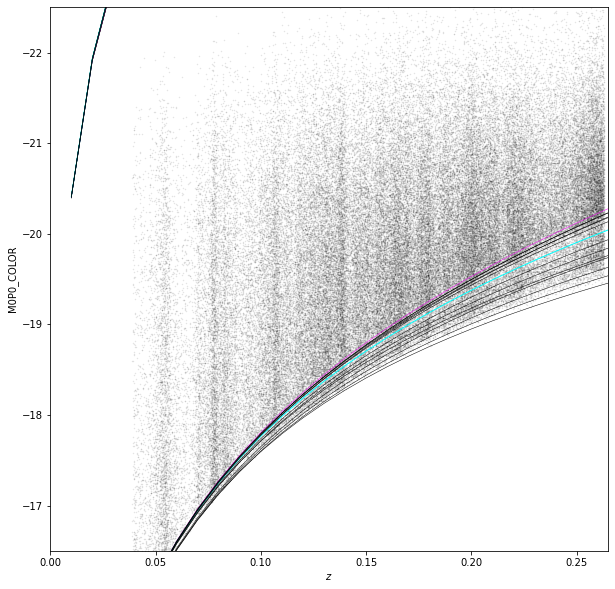

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

for i, ddp_limit in enumerate(ddp_limits):
    data = ddp_limit['DATA']

    cnt  = ddp_limit['COUNT']
    rlim = ddp_limit['RLIM']
    MCOL = [x for x in data.dtype.names if 'M0P0' in x][0]
    
    if (ddp_limit['ALL'] == True) & (ddp_limit['GMR_0P1'] == 0.603):
        ax.plot(data['Z'], data[MCOL], c='cyan', lw=1.)
        continue
    
    if (ddp_limit['ALL'] == False) & (rlim == 19.8) & (ddp_limit['GMR_0P1'] == 1.067):
        ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5)

        print('\t\t\t\t\t\t\tFAINT: {}'.format(cnt))
        
    elif (ddp_limit['ALL'] == False) & (rlim == 12.0) & (ddp_limit['GMR_0P1'] == 0.131):        
        ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5)

        print('\t\t\t\t\t\t\tBRIGHT: {}'.format(cnt))
        
    else:
        ax.plot(data['Z'], data[MCOL], c='k', lw=0.5)
    
    print('{:d}\t{}\t{:.3f}\t{:.3f}\t{:.3f}\t{}'.format(i, cnt, ddp_limit['RLIM'], ddp_limit['GMR_0P1'], ddp_limit['GMR_0P0'], ddp_limit['ALL']))

plt.scatter(gama_kE['ZGAMA'], gama_kE['MCOLOR_0P0'], s=0.25, alpha=0.1, c='k')
    
ax.set_xlabel(r'$z$')
ax.set_ylabel('M0P0_COLOR')

ax.set_xlim(  0.0, 0.265)
ax.set_ylim(-16.5, -22.5)

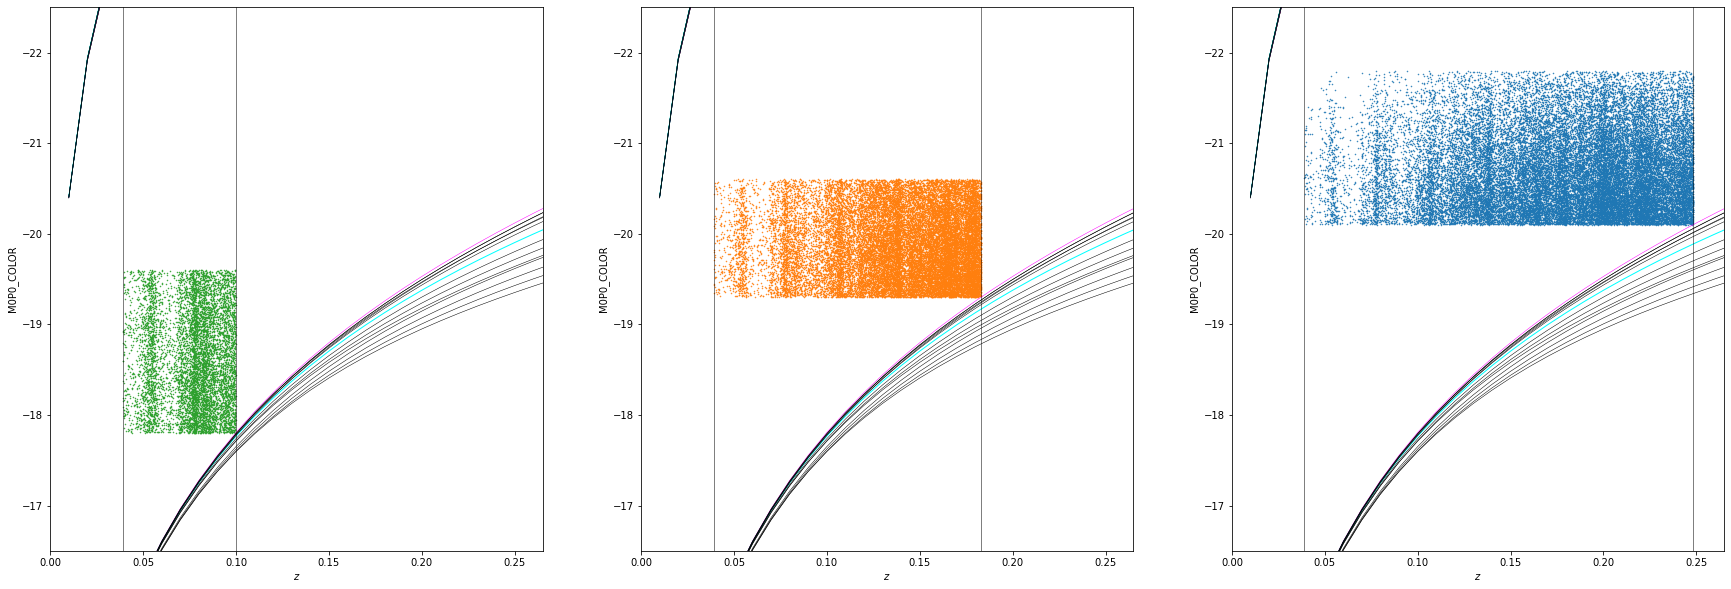

In [10]:
fig, axes = plt.subplots(1,3,figsize=(30,10))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for ax in axes:
    for i, ddp_limit in enumerate(ddp_limits):
        data = ddp_limit['DATA']

        cnt  = ddp_limit['COUNT']
        rlim = ddp_limit['RLIM']
        MCOL = [x for x in data.dtype.names if 'M0P0' in x][0]
    
        if (ddp_limit['ALL'] == True) & (ddp_limit['GMR_0P1'] == 0.603):
            ax.plot(data['Z'], data[MCOL], c='cyan', lw=1.)
            continue
    
        if (ddp_limit['ALL'] == False) & (rlim == 19.8) & (ddp_limit['GMR_0P1'] == 1.067):
            ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5)
        
        elif (ddp_limit['ALL'] == False) & (rlim == 12.0) & (ddp_limit['GMR_0P1'] == 0.131):        
            ax.plot(data['Z'], data[MCOL], c='magenta', lw=0.5)
        
        else:
            ax.plot(data['Z'], data[MCOL], c='k', lw=0.5)
        
        # print('{:d}\t{}\t{:.3f}\t{:.3f}\t{:.3f}\t{}'.format(i, cnt, ddp_limit['RLIM'], ddp_limit['GMR_0P1'], ddp_limit['GMR_0P0'], ddp_limit['ALL']))
    
        ax.set_xlabel(r'$z$')
        ax.set_ylabel('M0P0_COLOR')

        ax.set_xlim(  0.0, 0.265)
        ax.set_ylim(-16.5, -22.5)

for i, ax in enumerate(axes[::-1]):    
    is_ddp = [x == 1 for x in gama_ddp['DDP'].data[:,i]]
    ax.scatter(gama_ddp['ZGAMA'][is_ddp], gama_ddp['MCOLOR_0P0'][is_ddp], s=0.25, alpha=1., c=colors[i])

for idx, ax in zip(range(3), axes[::-1]):
    zmin = gama_ddp.meta['DDP{}_ZMIN'.format(idx+1)]
    zmax = gama_ddp.meta['DDP{}_ZMAX'.format(idx+1)]
    
    ax.axvline(zmin, lw=0.5, c='k')
    ax.axvline(zmax, lw=0.5, c='k')

# Done.